In [1]:
pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post11-py3-none-any.whl size=2959 sha256=85a21173c467f210586607ca02127e89f4fb596196c3819460a4db295ac0237c
  Stored in directory: /Users/bochenwang/Library/Caches/pip/wheels/52/cc/47/500a56407c060a5d18bda9aa3ec2daf4721b8448ee4b268840
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.1 MB/s eta 0:00:0000:010:01
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install skopt #should look into the project

ERROR: Could not find a version that satisfies the requirement skopt (from versions: none)
ERROR: No matching distribution found for skopt
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
df = pd.read_csv('bank-additional-full.csv', delimiter=';')

In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
cols_to_drop = ['duration', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
# at the same time, rename the columns so they are understandable. Please read the UCI page (https://archive.ics.uci.edu/ml/datasets/bank+marketing) for details
df = df.drop(columns=cols_to_drop).rename(columns={'job': 'job_type', 'default': 'default_status', 
                                                   'housing': 'housing_loan_status', 'loan': 'personal_loan_status', 
                                                   'contact': 'contact_type', 'month': 'contact_month', 
                                                   'day_of_week': 'contact_day_of_week', 'campaign': 'num_contacts', 
                                                   'pdays': 'days_last_contact', 'previous': 'previous_contacts', 
                                                   'poutcome': 'previous_outcome', 
                                                   'y': 'result'
                                                    })
# convert the target to numerical values
df['result'] = df['result'].replace({'yes': 1, 'no': 0})

In [11]:
df.head()


,age,job_type,marital,education,default_status,housing_loan_status,personal_loan_status,contact_type,contact_month,contact_day_of_week,num_contacts,days_last_contact,previous_contacts,previous_outcome,result
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   41188 non-null  int64 
 1   job_type              41188 non-null  object
 2   marital               41188 non-null  object
 3   education             41188 non-null  object
 4   default_status        41188 non-null  object
 5   housing_loan_status   41188 non-null  object
 6   personal_loan_status  41188 non-null  object
 7   contact_type          41188 non-null  object
 8   contact_month         41188 non-null  object
 9   contact_day_of_week   41188 non-null  object
 10  num_contacts          41188 non-null  int64 
 11  days_last_contact     41188 non-null  int64 
 12  previous_contacts     41188 non-null  int64 
 13  previous_outcome      41188 non-null  object
 14  result                41188 non-null  int64 
dtypes: int64(5), object(10)
memory usage

In [13]:
X = df.drop(columns = 'result')
Y = df['result']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, stratify = Y, random_state =8)

In [15]:
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier

estimators = [
    ('encoder', TargetEncoder()),# encode categorical values
    ('clf', XGBClassifier(random_state=8)) # can customize objective function with the objective parameter
]
pipe = Pipeline(steps=estimators)
pipe

Pipeline(steps=[('encoder', TargetEncoder()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=8, ...))])

In [16]:
# from skopt import BayesSearchCV #sklearn optimizor 
# from skopt.space import Real, Categorical, Integer
import numpy as np
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
# search_space = {
#     'clf__max_depth': Integer(2,8),
#     'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
#     'clf__subsample': Real(0.5, 1.0),
#     'clf__colsample_bytree': Real(0.5, 1.0),
#     'clf__colsample_bylevel': Real(0.5, 1.0),
#     'clf__colsample_bynode' : Real(0.5, 1.0),
#     'clf__reg_alpha': Real(0.0, 10.0),
#     'clf__reg_lambda': Real(0.0, 10.0),
#     'clf__gamma': Real(0.0, 10.0)
# }
n_samples = 1
search_space = {
        'clf__max_depth': np.random.randint(2, 9, size=n_samples),
        'clf__learning_rate': loguniform.rvs(0.001, 1.0, size=n_samples),
        'clf__subsample': np.random.uniform(0.5, 1.0, size=n_samples),
        'clf__colsample_bytree': np.random.uniform(0.5, 1.0, size=n_samples),
        'clf__colsample_bylevel': np.random.uniform(0.5, 1.0, size=n_samples),
        'clf__colsample_bynode': np.random.uniform(0.5, 1.0, size=n_samples),
        'clf__reg_alpha': np.random.uniform(0.0, 10.0, size=n_samples),
        'clf__reg_lambda': np.random.uniform(0.0, 10.0, size=n_samples),
        'clf__gamma': np.random.uniform(0.0, 10.0, size=n_samples)
}
gbm_param_grid = {
    'clf__learning_rate': np.arange(0.05, 1, 0.05),
    'clf__max_depth': np.arange(3, 10, 1),
    'clf__n_estimators': np.arange(50, 200, 50)
}

randomized_roc_auc = RandomizedSearchCV(estimator=pipe, param_distributions=search_space,
                                        n_iter=10, scoring='roc_auc', cv=3, verbose=1, random_state = 8)
# opt = RandomizedSearchCV(pipe, search_space, cv=3, n_iter=10, scoring='roc_auc', random_state=8) 
# # in reality, you may consider setting cv and n_iter to higher values

In [17]:
randomized_roc_auc.fit(x_train, y_train)

# Compute metrics
print('Score: ', randomized_roc_auc.best_score_)
print('Estimator: ', randomized_roc_auc.best_estimator_)

/Users/bochenwang/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Score:  0.75923369051359
Estimator:  Pipeline(steps=[('encoder',
                 TargetEncoder(cols=['job_type', 'marital', 'education',
                                     'default_status', 'housing_loan_status',
                                     'personal_loan_status', 'contact_type',
                                     'contact_month', 'contact_day_of_week',
                                     'previous_outcome'])),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=0.8265563383618216,
                               colsample_bynode=0.589410097087...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.01089932762088515, max_bin=None,
                               max_cat_threshold=None, max_cat

In [18]:
# from xgboost import XGBRegressor

# my_model = XGBRegressor()
# # Add silent=True to avoid printing out updates with each cycle
# my_model.fit(x_train, y_train, verbose=False)

# predictions = my_model.predict(x_test)

# from sklearn.metrics import mean_absolute_error
# print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))

In [19]:
randomized_roc_auc.score(x_test, y_test)

0.7753816512571348

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

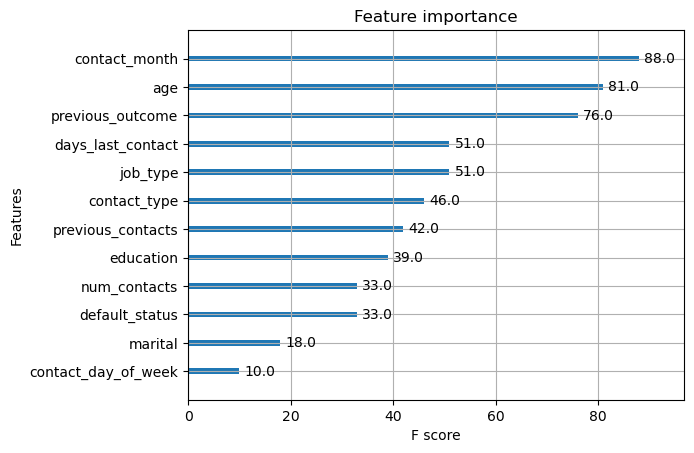

In [21]:
from xgboost import plot_importance #providing the best feature selections

xgboost_step = randomized_roc_auc.best_estimator_.steps[1]
xgboost_model = xgboost_step[1]
plot_importance(xgboost_model)

In [22]:
#Used website:
#https://goodboychan.github.io/python/datacamp/machine_learning/2020/07/07/03-Using-XGBoost-in-pipelines.html
#https://github.com/liannewriting/YouTube-videos-public/blob/main/xgboost-python-tutorial-example/xgboost_python.ipynb
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.loguniform.html
#chatgpt